***KNN***

In [ ]:
import csv
import math
import random
from collections import Counter

# ---------- KNN Implementation ----------

def load_dataset(filename):
    with open(filename, 'r') as f:
        data = list(csv.reader(f))
        header = data[0]
        rows = data[1:]
        for row in rows:
            for i in range(4):
                row[i] = float(row[i])
        return rows

def compute_mean_std(dataset):
    means, stds = [], []
    for i in range(4):
        col = [row[i] for row in dataset]
        mean = sum(col) / len(col)
        std = (sum((x - mean) ** 2 for x in col) / len(col)) ** 0.5
        means.append(mean)
        stds.append(std)
    return means, stds

def normalize_dataset(dataset, means, stds):
    for row in dataset:
        for i in range(4):
            row[i] = (row[i] - means[i]) / stds[i]
    return dataset

def split_dataset(dataset, test_size=0.2):
    random.shuffle(dataset)
    split_index = int(len(dataset) * (1 - test_size))
    return dataset[:split_index], dataset[split_index:]

def euclidean_distance(row1, row2):
    return math.sqrt(sum((row1[i] - row2[i]) ** 2 for i in range(4)))

def knn_predict(train, test_row, k):
    distances = []
    for train_row in train:
        dist = euclidean_distance(test_row, train_row)
        distances.append((train_row, dist))
    distances.sort(key=lambda x: x[1])
    neighbors = distances[:k]
    labels = [neighbor[0][4] for neighbor in neighbors]
    prediction = Counter(labels).most_common(1)[0][0]
    return prediction

def evaluate_model(train, test, k):
    correct = 0
    predictions = []
    for row in test:
        prediction = knn_predict(train, row, k)
        predictions.append(prediction)
        if prediction == row[4]:
            correct += 1
    accuracy = correct / len(test)
    return accuracy, predictions


filename = '/content/sample_data/IRIS.csv'
dataset = load_dataset(filename)

means, stds = compute_mean_std(dataset)

dataset = normalize_dataset(dataset, means, stds)

train_data, test_data = split_dataset(dataset)

k = 3
accuracy, predictions = evaluate_model(train_data, test_data, k)

print(f"Model Accuracy: {accuracy:.2f}\n\n")

print("\n--- Predict Iris Species from Your Input ---")
try:
    user_input = []
    user_input.append(float(input("Enter Sepal Length (cm): ")))
    user_input.append(float(input("Enter Sepal Width (cm): ")))
    user_input.append(float(input("Enter Petal Length (cm): ")))
    user_input.append(float(input("Enter Petal Width (cm): ")))

    for i in range(4):
        user_input[i] = (user_input[i] - means[i]) / stds[i]

    predicted_species = knn_predict(train_data, user_input, k)
    print(f"\n Predicted Iris Species: {predicted_species}")

except ValueError:
    print("Invalid input. Please enter numeric values for all measurements.")


Model Accuracy: 0.97



--- Predict Iris Species from Your Input ---
Enter Sepal Length (cm): 5.1
Enter Sepal Width (cm): 3.5
Enter Petal Length (cm): 1.4
Enter Petal Width (cm): 0.3

 Predicted Iris Species: Iris-setosa


***SVM***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def PlotData(x,y):
    pos = np.argwhere(y == 1)
    neg = np.argwhere(y == 0)

    plt.plot(x[pos, 0], x[pos, 1], linestyle='', marker='+', color='k')
    plt.plot(x[neg, 0], x[neg, 1], linestyle='', marker='o', color='y')
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.legend(['Admitted', 'Not admitted'], loc='upper right', numpoints=1)
    plt.figure()

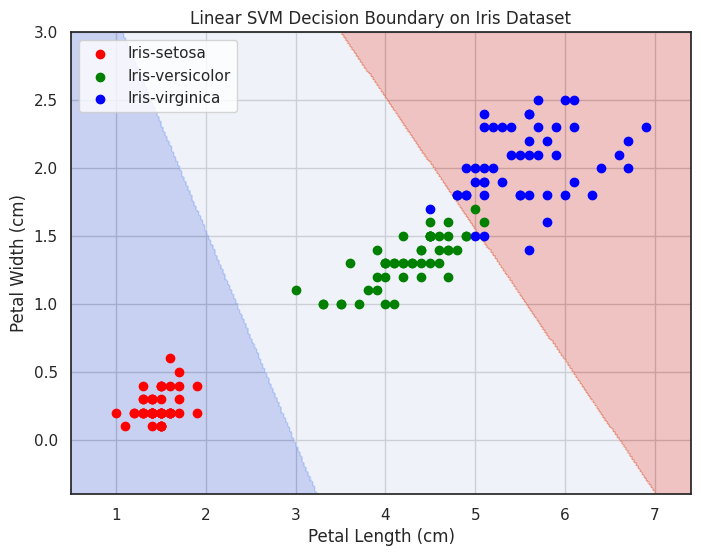

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

df = pd.read_csv("/content/sample_data/IRIS.csv")

X = df[["petal_length", "petal_width"]].values
y = df["species"].values

label_map = {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}
label_map_rev = {v: k for k, v in label_map.items()}
y_numeric = np.array([label_map[label] for label in y])

svm_model = SVC(kernel="linear")
svm_model.fit(X, y_numeric)

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

colors = ["red", "green", "blue"]

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

for label in np.unique(y_numeric):
    plt.scatter(X[y_numeric == label, 0], X[y_numeric == label, 1],
                label=label_map_rev[label], color=colors[label])

plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("Linear SVM Decision Boundary on Iris Dataset")
plt.legend()
plt.grid(True)
plt.show()


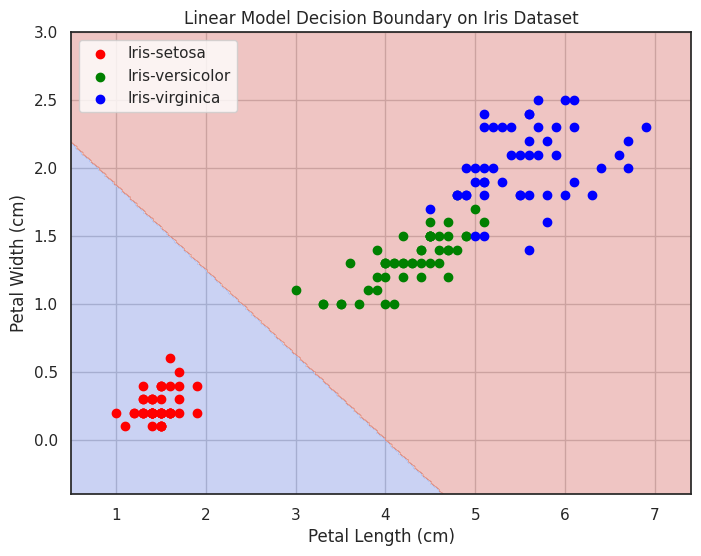

In [ ]:

import csv
import math
import random
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ***KNN*** (No changes needed here)

# ---------- KNN Implementation ----------

def load_dataset(filename):
    df = pd.read_csv("/content/sample_data/IRIS.csv")
    X  = df[["petal_length", "petal_width"]].values
    y = df["species"].values

    label_map = {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}
    label_map_rev = {v: k for k, v in label_map.items()}
    y_numeric = np.array([label_map[label] for label in y])

class SimpleLinearModel:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation = self._unit_step_func
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = np.array([1 if i > 0 else 0 for i in y])

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation(linear_output)

                update = self.lr * (y_[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation(linear_output)
        return y_predicted

    def _unit_step_func(self, x):
        return np.where(x>=0, 1, 0)


svm_model = SimpleLinearModel()
svm_model.fit(X, y_numeric)


x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

colors = ["red", "green", "blue"]

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

for label in np.unique(y_numeric):
    plt.scatter(X[y_numeric == label, 0], X[y_numeric == label, 1],
                label=label_map_rev[label], color=colors[label])

plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("Linear Model Decision Boundary on Iris Dataset")
plt.legend()
plt.grid(True)
plt.show()
